# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
#from copy import deepcopy

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', eps=0.01):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.eps = eps

    def _distance(self, X, y):
        
        dist = np.sum((X**2), axis=1).reshape(-1, 1) + np.sum((y**2), axis=1) - 2*X.dot(y.T)
        dist[dist < 0] = 0
        
        return np.sqrt(dist)

    
    def init_kmppcentr(self, X):
        
        for centroid in range(1, self.k):
            min_dist = np.min(self._distance(X, self.centroids[:centroid, :]), axis=1)
            proba = min_dist / np.sum(min_dist)
            self.centroids[centroid] = X[np.random.choice(X.shape[0], p=proba, replace=False)]

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = X[np.random.choice(X.shape[0], size=self.k, replace=False)]
        
        if self.init == 'k-means':
            self.init_kmppcentr(X)

        new_centroids = np.empty((self.k, X.shape[1]))
        # Your Code Here
        for _ in range(self.max_iter):
            self.labels = np.argmin(self._distance(X, self.centroids), axis=1)
            
            for centroid in range(self.k):
                if np.any(self.labels == centroid, axis=0):
                    new_centroids[centroid] = np.mean(X[self.labels == centroid], axis=0)
                    
                else:
                    new_centroids[centroid] = X[np.random.choice(X.shape[0])]
                    
            if np.all(np.abs(new_centroids - self.centroids) < self.eps):
                break

            self.centroids = new_centroids

        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """

        return np.argmin(self._distance(X, self.centroids), axis=1)


class MiniBatchKMeans(MyKmeans):

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', eps=0.01, batch_size=10):
        super().__init__(k, metric, max_iter, random_state, init, eps)
        self.batch_size = batch_size

    def __fit__(self, X, y=None):

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = X[np.random.choice(X.shape[0], size=self.k, replace=False)]

        if self.init == 'k-means':
            self.init_kmppcentr(X)

        new_centroids = np.empty((self.k, X.shape[1]))
        
        for _ in range(self.max_iter):
            X_batch = X[np.random.choice(X.shape[0], size=self.batch_size,replace=False)]
            self.labels = np.argmin(self._distance(X_batch, self.centroids), axis=1)
            
            for centroid in range(self.k):
                if np.any(self.labels == centroid, axis=0):
                    new_centroids[centroid] = np.mean(X_batch[self.labels == centroid], axis=0)
                    
                else:
                    new_centroids[centroid] = X_batch[np.random.choice(X.shape[0])]
                    
            if np.all(np.abs(new_centroids - self.centroids) < self.eps):
                break

            self.centroids = new_centroids

        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [40]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [41]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

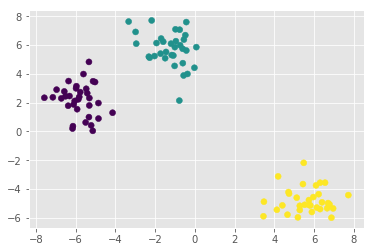

In [42]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

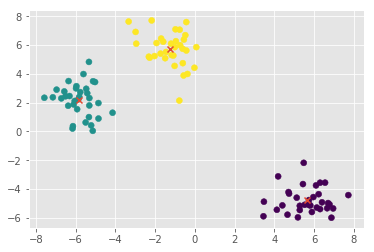

In [45]:
## Работоспособность MyKmeans
clf = MyKmeans(k=3)
clf.fit(X)
prediction = clf.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=prediction)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1], marker='x')

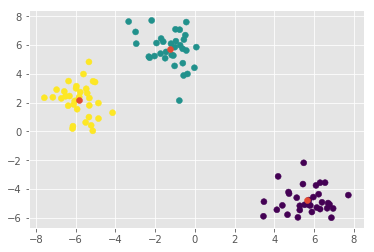

In [47]:
## Работоспособность MyKmeans++
clf = MyKmeans(k=3, init="k-means")
clf.fit(X)

prediction = clf.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=prediction)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

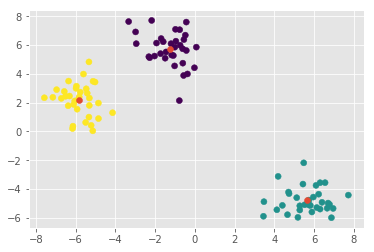

In [48]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
clf = MiniBatchKMeans(k=3)
clf.fit(X)
prediction = clf.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=prediction)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

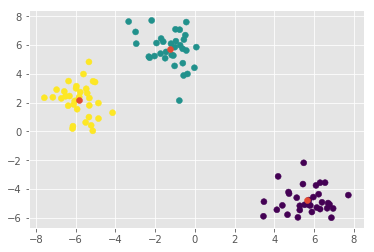

In [50]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
clf = MiniBatchKMeans(k=3, init="k-means")
clf.fit(X)
prediction = clf.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=prediction)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

In [51]:
## Время выполнения алгоритма Kmeans из sklearn
start = time()

clf = KMeans(n_clusters=3, init='random', max_iter=1000, n_init=1)
clf.fit(X)
prediction = clf.predict(X)

print("%.3fms" % (1000*(time() - start)))

6.042ms


In [62]:
## Время выполнения алгоритма MyKmeans
start = time()

clf = MyKmeans(k=3)
clf.fit(X)
prediction = clf.predict(X)

print("%.3fms" % (1000*(time() - start)))

16.256ms


In [64]:
## Время выполнения алгоритма MyKmeans++
start = time()

clf = MyKmeans(k=3, init='k-means')
clf.fit(X)
prediction = clf.predict(X)

print("%.3fms" % (1000*(time() - start)))

16.803ms


In [65]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
start = time()

clf = MiniBatchKMeans(k=3)
clf.fit(X)
prediction = clf.predict(X)

print("%.3fms" % (1000*(time() - start)))

17.466ms


In [66]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
start = time()

clf = MiniBatchKMeans(k=3, init='k-means')
clf.fit(X)
prediction = clf.predict(X)

print("%.3fms" % (1000*(time() - start)))

16.315ms


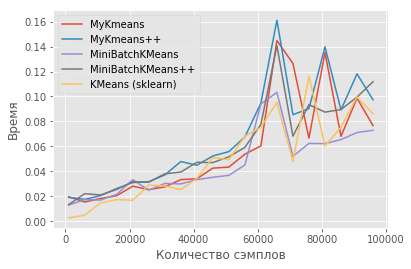

In [67]:
models = (
    MyKmeans(k=3),
    MyKmeans(k=3, init='k-means'),
    MiniBatchKMeans(k=3),
    MiniBatchKMeans(k=3, init='k-means'),
    KMeans(n_clusters=3, init='random', max_iter=1000, n_init=1)
)

labels = ("MyKmeans", "MyKmeans++", "MiniBatchKMeans", "MiniBatchKMeans++", "KMeans (sklearn)")

samples = range(1000, 100001, 5000)
results = np.empty((5, len(samples)))

for i, sample in enumerate(samples):
    X, _ = make_blobs(n_samples=sample, n_features=2, centers=3, cluster_std=1,
                      center_box=(-10.0, 10.0), shuffle=False,
                      random_state=1234)

    for j, model in enumerate(models):
        start = time()
        model.fit(X)
        results[j][i] = time() - start

for i, model in enumerate(models):
    plt.plot(samples, results[i], label=labels[i])

plt.xlabel('Количество сэмплов')
plt.ylabel('Время')

plt.legend()
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [69]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [70]:
df_sns = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis='columns')

df_sns_scaled = (df_sns - df_sns.mean()) / df_sns.std()

In [71]:
def print_cluster_info(df, df_scaled, model):
    model.fit(df_scaled.values)

    df['cluster'] = model.labels
    counts = df.cluster.value_counts().sort_index()
    for cluster in range(9):
        print('Cluster: ' + str(cluster+1))
        print('Number of students: ' + str(counts[cluster]))
        print("Popular key words:")
        key_words = df[df.cluster == cluster].drop(['cluster'], axis=1).mean()
        print(key_words.T.sort_values(ascending=False)[:8])
        print('_'*22)

In [72]:
## MyKMeans
print_cluster_info(df_sns, df_sns_scaled, MyKmeans(k=9))

Cluster: 1
Number of students: 2549
Popular key words:
hair        1.525696
shopping    0.934484
music       0.905845
football    0.777168
tennis      0.652413
god         0.610828
dance       0.580620
mall        0.551981
dtype: float64
______________________
Cluster: 2
Number of students: 722
Popular key words:
basketball    3.836565
music         0.778393
softball      0.713296
shopping      0.632964
football      0.585873
dance         0.566482
god           0.560942
church        0.497230
dtype: float64
______________________
Cluster: 3
Number of students: 804
Popular key words:
soccer        2.635572
volleyball    2.476368
music         0.858209
shopping      0.641791
hair          0.588308
basketball    0.546020
dance         0.538557
cute          0.529851
dtype: float64
______________________
Cluster: 4
Number of students: 17040
Popular key words:
music       0.462324
god         0.281573
dance       0.216491
band        0.167312
shopping    0.159683
cute        0.151174
footb

In [73]:
## MyKMeans++
print_cluster_info(df_sns, df_sns_scaled, MyKmeans(k=9, init='k-means'))

Cluster: 1
Number of students: 738
Popular key words:
hollister      1.350949
abercrombie    1.287263
shopping       0.911924
hair           0.880759
music          0.865854
tennis         0.672087
cute           0.632791
mall           0.604336
dtype: float64
______________________
Cluster: 2
Number of students: 1646
Popular key words:
dance         3.185905
music         0.966586
sports        0.779465
hair          0.620899
football      0.516403
god           0.504253
cute          0.495140
basketball    0.492710
dtype: float64
______________________
Cluster: 3
Number of students: 607
Popular key words:
hair      3.322900
sex       3.046129
music     2.036244
kissed    1.685338
soccer    1.639209
drugs     1.289951
die       1.115321
blonde    1.093904
dtype: float64
______________________
Cluster: 4
Number of students: 1771
Popular key words:
volleyball    1.330322
shopping      1.013552
dress         0.897798
music         0.854320
swimming      0.758893
hair          0.731225
cu

In [74]:
## MyKMeans с MiniBatchMyKMeans
print_cluster_info(df_sns, df_sns_scaled, MiniBatchKMeans(k=9))

Cluster: 1
Number of students: 382
Popular key words:
sex       3.939791
hair      3.565445
kissed    3.397906
music     2.667539
blonde    1.471204
rock      1.335079
band      1.094241
die       1.015707
dtype: float64
______________________
Cluster: 2
Number of students: 691
Popular key words:
death    1.950796
music    1.222865
hair     1.107091
god      0.859624
dance    0.806078
mall     0.753980
die      0.706223
sex      0.610709
dtype: float64
______________________
Cluster: 3
Number of students: 18079
Popular key words:
music       0.427679
god         0.271254
dance       0.238841
band        0.209857
hair        0.173793
cute        0.147685
football    0.137286
rock        0.135129
dtype: float64
______________________
Cluster: 4
Number of students: 1760
Popular key words:
dance      1.263636
church     1.243750
music      1.106818
clothes    0.976136
tennis     0.913636
hair       0.858523
god        0.677273
band       0.598864
dtype: float64
______________________
Clust

In [75]:
## MyKMeans++ с MiniBatchMyKMeans
print_cluster_info(df_sns, df_sns_scaled, MiniBatchKMeans(k=9, init='k-means'))

Cluster: 1
Number of students: 1611
Popular key words:
soccer        2.747362
music         1.636251
hair          0.691496
rock          0.482309
god           0.461204
dance         0.409063
basketball    0.389199
shopping      0.376785
dtype: float64
______________________
Cluster: 2
Number of students: 431
Popular key words:
hair           2.387471
music          1.754060
sex            1.698376
abercrombie    1.524362
hollister      1.208817
god            1.127610
sports         1.118329
shopping       1.004640
dtype: float64
______________________
Cluster: 3
Number of students: 1198
Popular key words:
hair        2.026711
music       1.500000
sex         1.210351
mall        1.133556
drunk       0.990818
die         0.937396
shopping    0.800501
dance       0.789649
dtype: float64
______________________
Cluster: 4
Number of students: 18954
Popular key words:
music         0.501636
god           0.343252
dance         0.208874
church        0.182494
cute          0.174897
hair   

In [76]:
## Вывод

In [ ]:
Слонжо сказать какой метод оказался лучше